In [37]:
library("phenopath")
library("reticulate")

In [2]:
library("ggplot2")

In [3]:
np <- import("numpy")

In [4]:
npzfile <- np$load('results/11_strains.seed_42.100000_droplets.iteration_1.npz')
cell_log_counts <- npzfile[["cell_log_counts"]]
cell_init_vectors <- npzfile[["cell_init_vectors"]]

In [5]:
z_init = c(rep(1,100000), rep(2,100000), rep(3,100000), rep(4,100000), rep(5,100000))

## No Scaling, and Spoonfed Initial Z

In [6]:
time_start <- proc.time()
phenopath_results01 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, z_init=z_init, elbo_tol=1, maxiter=100)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -10620775.0120872 	 Inf 
[ 2 ] 	 -5287506.28057621 	 100.865482677588 
[ 3 ] 	 -2642680.12373442 	 100.081206691952 
[ 4 ] 	 -1689956.9670505 	 56.3755867906342 
[ 5 ] 	 -1349072.61607773 	 25.2680505786156 
[ 6 ] 	 -1126979.92084499 	 19.7068901694557 
[ 7 ] 	 -971497.728986912 	 16.0043803725835 
[ 8 ] 	 -861850.278796112 	 12.7223315799077 
[ 9 ] 	 -776078.610074838 	 11.0519305142301 
[ 10 ] 	 -700885.401479006 	 10.7283171310402 
[ 11 ] 	 -629657.572811159 	 11.3121531040823 
[ 12 ] 	 -558733.45319344 	 12.6937306532038 
[ 13 ] 	 -486758.809279389 	 14.7865108020549 
[ 14 ] 	 -415241.376389564 	 17.2230988904945 
[ 15 ] 	 -347940.564941046 	 19.3426171679412 
[ 16 ] 	 -287934.691827158 	 20.8400984032546 
[ 17 ] 	 -235318.258612613 	 22.3596900320273 
[ 18 ] 	 -188322.317780459 	 24.9550565148315 
[ 19 ] 	 -145277.603654791 	 29.6292842411908 
[ 20 ] 	 -105152.406825276 	 38.1590855035665 
[ 21 ] 	 -67338.9912744436 	 56.153819407127 
[ 22 ] 	 -3

    user   system  elapsed 
1566.706   73.596 1898.440 

In [7]:
interaction_effects(phenopath_results01)

-11.02209792,-0.001799966,0.026136431,0.020875981,0.021305037,-0.005079387,-0.003636382,0.023241839,0.019173174,0.027128202,0.3164937
0.11276457,2.795526998,0.030266797,0.027130045,0.085394051,-0.005819561,0.155003082,0.008324145,0.021883454,0.031422399,-2.6536810
0.44215848,0.018375023,4.981122036,0.058057075,-0.049162106,-0.141992268,-1.237962655,0.033037451,0.054544383,0.080365585,1.0086001
1.31221683,-0.292064794,0.131952728,4.005504461,0.060180479,0.079111712,-0.134062870,0.119947935,0.100438867,0.165195171,3.0221371
0.21148239,-1.071243154,0.101339686,0.072349226,7.240978492,-0.078983353,-0.809451966,-0.113847545,0.063358373,0.099818479,2.1188651
0.68170613,0.041856055,0.124454267,0.095215369,0.113353494,7.031626156,0.078340819,0.029733330,0.091397566,0.130978907,5.2010094
0.07615799,0.027679546,0.006595592,0.005325801,0.008785734,0.007315246,1.129007335,0.024635027,0.004918535,0.006899702,-0.2371910
0.14120133,-0.007678779,0.037053036,0.028700822,0.068606281,0.009209642,-0.771110077,4.891468340,0.026320445,0.039854528,-0.5995014
0.50538658,-0.017958080,0.083623235,0.069154668,0.019000911,-0.521412979,0.057947995,0.097263831,7.581437564,0.120659042,0.1310282
0.24935308,0.039545272,0.020541106,-0.007702645,-0.145432494,-0.133154586,0.069666987,-0.070472471,0.022731319,7.981332334,0.7457738
1.14150239,-0.034192157,0.279460815,0.228146118,0.230920483,-0.072084545,0.083137645,0.192351472,0.207354398,0.299589907,3.5228334


In [8]:
significant_interactions(phenopath_results01) * interaction_effects(phenopath_results01)

-11.0220979,-0.001799966,0.026136431,0.020875981,0.021305037,-0.005079387,-0.003636382,0.02324184,0.019173174,0.027128202,0.3164937
0.0000000,2.795526998,0.030266797,0.027130045,0.085394051,-0.005819561,0.155003082,0.00000000,0.021883454,0.031422399,-2.6536810
0.4421585,0.018375023,4.981122036,0.058057075,-0.049162106,-0.141992268,-1.237962655,0.03303745,0.054544383,0.080365585,1.0086001
1.3122168,-0.292064794,0.131952728,4.005504461,0.060180479,0.079111712,-0.134062870,0.11994793,0.100438867,0.165195171,3.0221371
0.2114824,-1.071243154,0.101339686,0.072349226,7.240978492,-0.078983353,-0.809451966,-0.11384755,0.063358373,0.099818479,2.1188651
0.6817061,0.041856055,0.124454267,0.095215369,0.113353494,7.031626156,0.078340819,0.02973333,0.091397566,0.130978907,5.2010094
0.0000000,0.027679546,0.006595592,0.005325801,0.008785734,0.007315246,1.129007335,0.02463503,0.004918535,0.006899702,-0.2371910
0.1412013,-0.007678779,0.037053036,0.028700822,0.068606281,0.009209642,-0.771110077,4.89146834,0.026320445,0.039854528,-0.5995014
0.5053866,-0.017958080,0.083623235,0.069154668,0.019000911,-0.521412979,0.057947995,0.09726383,7.581437564,0.120659042,0.1310282
0.2493531,0.039545272,0.020541106,-0.007702645,-0.145432494,-0.133154586,0.069666987,-0.07047247,0.022731319,7.981332334,0.7457738
1.1415024,-0.034192157,0.279460815,0.228146118,0.230920483,-0.072084545,0.083137645,0.19235147,0.000000000,0.299589907,3.5228334


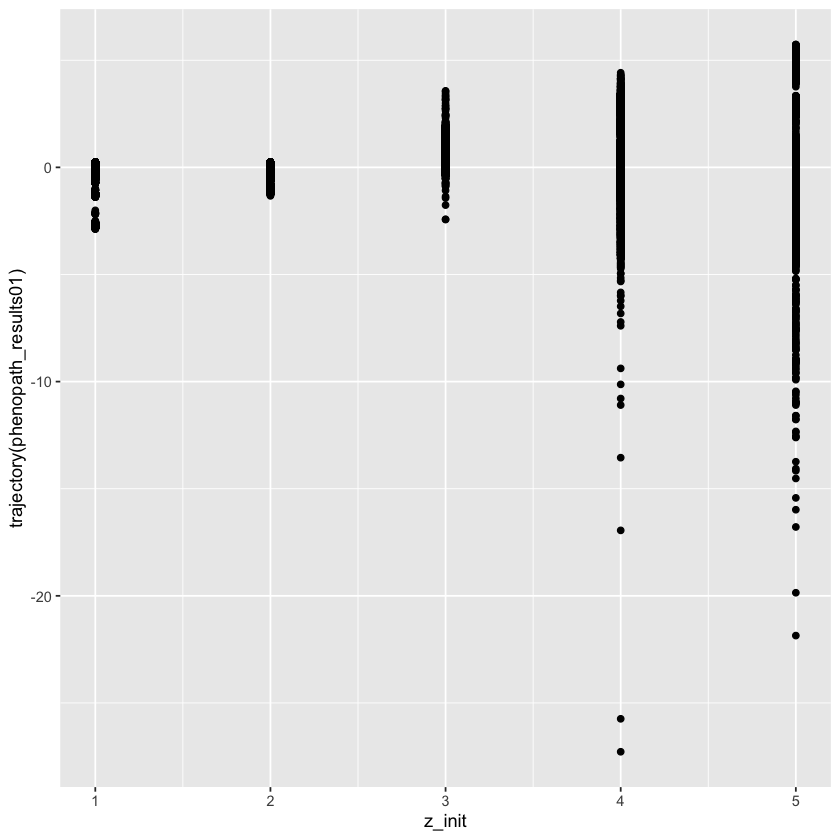

In [9]:
qplot(z_init, trajectory(phenopath_results01))

In [10]:
cor(z_init, trajectory(phenopath_results01))

[1] 0.5205028

In [117]:
cor(exp(z_init), trajectory(phenopath_results01))

[1] 0.4222491

In [118]:
spearman(z_init, trajectory(phenopath_results01))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 3.915e+15, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8120778 


oof dang wow these are much better numbers than the stuff below

In [11]:
interaction_sds(phenopath_results01)

0.003951897,0.0009809290,1.697647e-04,1.940218e-04,0.0006743023,0.0008333996,0.0014957136,0.0007943336,1.168600e-04,1.743340e-04,0.011638458
0.008192435,0.0020342147,3.520515e-04,4.023547e-04,0.0013983316,0.0017282518,0.0031016358,0.0016472409,2.423398e-04,3.615271e-04,0.024135300
0.011566149,0.0028726439,4.971739e-04,5.682123e-04,0.0019747296,0.0024406317,0.0043801555,0.0023262311,3.422366e-04,5.105550e-04,0.033969461
0.021112137,0.0052462843,9.080672e-04,1.037821e-03,0.0036066031,0.0044574040,0.0079979960,0.0042485016,6.250824e-04,9.325080e-04,0.062068823
0.014828297,0.0036846491,6.377092e-04,7.288285e-04,0.0025329768,0.0031304637,0.0056179166,0.0029837351,4.389767e-04,6.548734e-04,0.043612677
0.010513112,0.0026106835,4.518321e-04,5.163924e-04,0.0017946442,0.0022181167,0.0039805903,0.0021140933,3.110252e-04,4.639933e-04,0.030986064
0.003550004,0.0008812301,1.525102e-04,1.743018e-04,0.0006057678,0.0007486950,0.0013437001,0.0007135995,1.049826e-04,1.566151e-04,0.010456795
0.011056071,0.0027459553,4.752454e-04,5.431512e-04,0.0018876369,0.0023329925,0.0041869093,0.0022236906,3.271422e-04,4.880368e-04,0.032450218
0.021738131,0.0054068794,9.358778e-04,1.069600e-03,0.0037170444,0.0045939470,0.0082427550,0.0043785913,6.442277e-04,9.610671e-04,0.062870588
0.016995361,0.0042243811,7.311564e-04,8.356278e-04,0.0029040268,0.0035891344,0.0064405526,0.0034209105,5.033027e-04,7.508379e-04,0.049646186
0.001209674,0.0003002645,5.196512e-05,5.939021e-05,0.0002064049,0.0002551051,0.0004578439,0.0002431468,3.577093e-05,5.336379e-05,0.003564923


In [12]:
sum(interaction_sds(phenopath_results01))

[1] 0.661764

## No Scaling, and No Spoonfed Initial Z

In [13]:
time_start <- proc.time()
phenopath_results00 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, elbo_tol=1, maxiter=100)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -7954496.10254245 	 Inf 
[ 2 ] 	 -3534524.79901266 	 125.051359231218 
[ 3 ] 	 -1412272.62059382 	 150.27213212747 
[ 4 ] 	 -860245.1459463 	 64.170949089201 
[ 5 ] 	 -582570.596953236 	 47.6636738011263 
[ 6 ] 	 -384871.150942739 	 51.3676968321045 
[ 7 ] 	 -253713.769844623 	 51.6950188310387 
[ 8 ] 	 -162725.30362779 	 55.9153765200252 
[ 9 ] 	 -90554.1418010999 	 79.6994597830899 
[ 10 ] 	 -25777.2964225549 	 251.294178864568 
[ 11 ] 	 39687.4373707183 	 164.950770647574 
[ 12 ] 	 115583.384277793 	 65.6633714104326 
[ 13 ] 	 218214.290406836 	 47.0321654634528 
[ 14 ] 	 374793.652956621 	 41.7774851080276 
[ 15 ] 	 615786.475979224 	 39.1357771603178 
[ 16 ] 	 861908.573718062 	 28.5554762121843 
[ 17 ] 	 961423.478736881 	 10.3507878910511 
[ 18 ] 	 1011405.01814381 	 4.94179270522726 
[ 19 ] 	 1052888.5678538 	 3.93997531899731 
[ 20 ] 	 1091256.99368392 	 3.51598441542089 
[ 21 ] 	 1128010.81621352 	 3.25828635695011 
[ 22 ] 	 1163929.20411097

   user  system elapsed 
765.347  37.452 926.338 

In [14]:
interaction_effects(phenopath_results00)

-7.166783339,0.011952761,1.637108e-04,0.0002891579,0.0005947621,0.004172924,-0.0138645297,0.002268137,-0.0012439556,-0.0009188280,-0.53837030
-0.003478903,-0.707944316,-7.501771e-04,-0.0013048540,-0.0011582805,-0.001158516,0.0353843249,0.002193710,0.0007757732,0.0010534745,-0.43850374
0.106744915,0.043553231,3.471215e+00,0.0040852250,-0.0213812387,-0.059673496,-0.8399604355,0.100129424,0.0223006320,0.0525922742,0.18004090
0.509287319,0.036200027,-3.506779e-05,1.3780931038,-0.0507246819,0.014574576,-0.1135441220,0.049959365,0.0482966868,0.0494592871,0.02427811
-0.063276836,0.139890642,-1.437603e-04,0.0017668914,3.3779008415,-0.029101465,-0.4806452367,0.071078559,0.0043383934,-0.0019921441,-0.05176873
0.111904857,0.086098686,-1.415433e-03,-0.0024467351,0.0024900294,3.291063396,-0.0001998589,0.045927572,-0.0025958088,0.0107685963,1.26080523
0.029033274,0.028618216,-2.473555e-04,-0.0008163544,0.0007016947,0.003295213,0.7176112289,-0.022152259,-0.0015302914,-0.0035426520,-0.69923711
-0.025467071,-0.004786987,-2.619574e-04,-0.0002989823,0.0008859312,0.002548637,-0.2870892674,-1.506367336,0.0052611307,0.0012995533,-0.38945591
0.017289934,0.033414461,-1.082130e-03,-0.0013997975,-0.0018146592,-0.008472311,-0.0542017831,-0.011934335,-1.5214185510,0.0025598751,-0.90204546
0.023025036,0.008088308,-1.079262e-04,-0.0001794710,-0.0003790402,0.001741723,-0.0242305240,0.002590784,-0.0029485147,-1.9126584985,-1.27749555
-0.066296954,0.040848951,-1.932791e-03,-0.0031451152,-0.0032530131,-0.010948018,-0.0126113835,-0.001706012,0.0011827141,0.0009922073,0.84065722


In [15]:
significant_interactions(phenopath_results00) * interaction_effects(phenopath_results00)

-7.166783339,0.000000000,1.637108e-04,0.0002891579,0.0005947621,0.004172924,-0.0138645297,0.002268137,-0.0012439556,-0.0009188280,-0.53837030
-0.003478903,-0.707944316,-7.501771e-04,-0.0013048540,-0.0011582805,-0.001158516,0.0353843249,0.002193710,0.0007757732,0.0010534745,-0.43850374
0.106744915,0.043553231,3.471215e+00,0.0000000000,-0.0213812387,-0.059673496,-0.8399604355,0.100129424,0.0223006320,0.0525922742,0.18004090
0.509287319,0.036200027,-3.506779e-05,1.3780931038,-0.0507246819,0.014574576,-0.1135441220,0.049959365,0.0482966868,0.0000000000,0.02427811
0.000000000,0.139890642,-1.437603e-04,0.0017668914,3.3779008415,-0.029101465,0.0000000000,0.000000000,0.0000000000,0.0000000000,-0.05176873
0.111904857,0.086098686,-1.415433e-03,-0.0024467351,0.0024900294,3.291063396,-0.0001998589,0.045927572,-0.0025958088,0.0000000000,1.26080523
0.029033274,0.028618216,-2.473555e-04,-0.0008163544,0.0007016947,0.000000000,0.7176112289,-0.022152259,-0.0015302914,-0.0035426520,-0.69923711
-0.025467071,-0.004786987,-2.619574e-04,-0.0002989823,0.0008859312,0.002548637,-0.2870892674,-1.506367336,0.0052611307,0.0000000000,-0.38945591
0.000000000,0.000000000,-1.082130e-03,-0.0013997975,-0.0018146592,0.000000000,-0.0542017831,-0.011934335,-1.5214185510,0.0025598751,-0.90204546
0.000000000,0.000000000,-1.079262e-04,-0.0001794710,0.0000000000,0.001741723,-0.0242305240,0.000000000,0.0000000000,-1.9126584985,-1.27749555
-0.066296954,0.040848951,-1.932791e-03,0.0000000000,0.0000000000,-0.010948018,-0.0126113835,-0.001706012,0.0011827141,0.0009922073,0.84065722


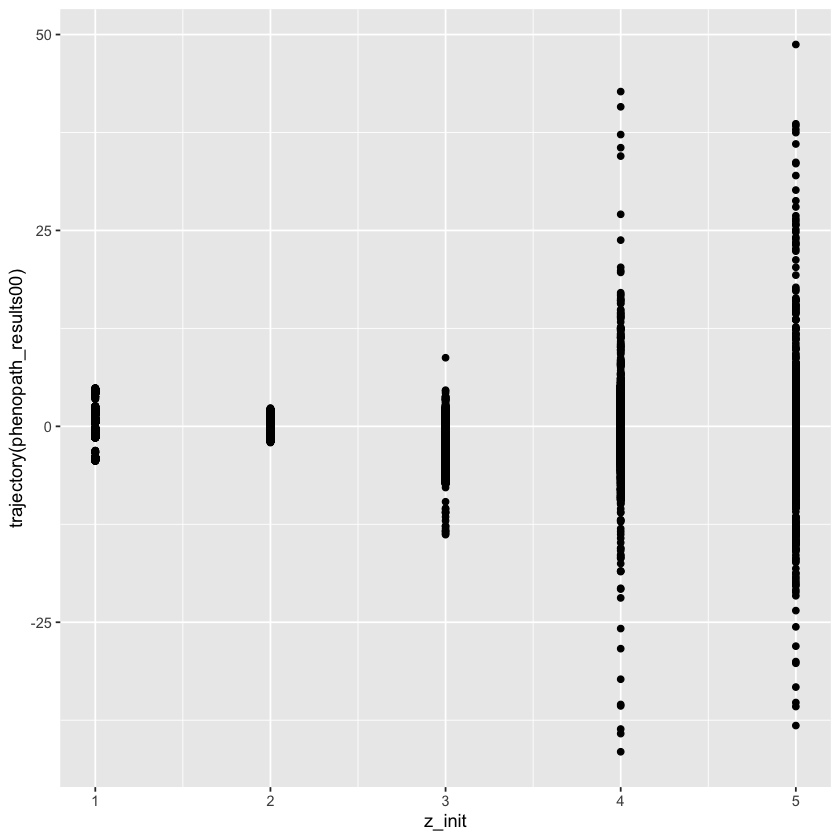

In [16]:
qplot(z_init, trajectory(phenopath_results00))

In [17]:
cor(z_init, trajectory(phenopath_results00))

[1] 0.2708153

In [119]:
cor(exp(z_init), trajectory(phenopath_results00))

[1] 0.2427417

In [120]:
spearman(z_init, trajectory(phenopath_results00))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 8.554e+15, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5894086 


hmm

In [18]:
interaction_sds(phenopath_results00)

0.002439652,0.0006196272,1.085975e-05,4.965760e-05,0.0003538970,0.0003859815,0.0007841590,0.0006293495,0.0005024085,0.0006770771,0.007748746
0.001847044,0.0004691239,8.221981e-06,3.759606e-05,0.0002679375,0.0002922289,0.0005936922,0.0004764846,0.0003803766,0.0005126195,0.005867269
0.007239115,0.0018390755,3.223263e-05,1.473878e-04,0.0010503898,0.0011456176,0.0023274070,0.0018679306,0.0014911742,0.0020095825,0.022942559
0.006968244,0.0017701785,3.102506e-05,1.418661e-04,0.0010110383,0.0011026986,0.0022402011,0.0017979525,0.0014353099,0.0019342983,0.022086589
0.006225454,0.0015814541,2.771728e-05,1.267408e-04,0.0009032494,0.0009851342,0.0020013739,0.0016062670,0.0012822853,0.0017280774,0.019742055
0.004240324,0.0010770605,1.887692e-05,8.631715e-05,0.0006151593,0.0006709311,0.0013630527,0.0010939598,0.0008733074,0.0011769210,0.013465701
0.001736481,0.0004410415,7.729802e-06,3.534551e-05,0.0002518985,0.0002747357,0.0005581533,0.0004479616,0.0003576068,0.0004819335,0.005516247
0.003120043,0.0007924728,1.388910e-05,6.350972e-05,0.0004526172,0.0004936517,0.0010029004,0.0008049085,0.0006425561,0.0008659481,0.009908257
0.004224522,0.0010730466,1.880657e-05,8.599547e-05,0.0006128668,0.0006684295,0.0013579732,0.0010898830,0.0008700548,0.0011725351,0.013413796
0.003871515,0.0009833675,1.723481e-05,7.880838e-05,0.0005616465,0.0006125656,0.0012444822,0.0009987968,0.0007973386,0.0010745457,0.012295581
0.000828285,0.0002103702,3.686997e-06,1.685927e-05,0.0001201517,0.0001310448,0.0002662308,0.0002136710,0.0001705731,0.0002298751,0.002631430


In [19]:
sum(interaction_sds(phenopath_results00))

[1] 0.2486732

## Scaling, and Spoonfed Initial Z

In [20]:
time_start <- proc.time()
phenopath_results11 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, z_init=z_init, elbo_tol=1, maxiter=100)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -10737161.1065729 	 Inf 
[ 2 ] 	 -5905706.19891164 	 81.8099435517413 
[ 3 ] 	 -3049032.34125356 	 93.6911628980491 
[ 4 ] 	 -1165930.84749366 	 161.510564525153 
[ 5 ] 	 -492805.367976663 	 136.590533151187 
[ 6 ] 	 -149027.200144347 	 230.681491364887 
[ 7 ] 	 32485.0718058959 	 558.755951148304 
[ 8 ] 	 177500.776532579 	 81.6986311606735 
[ 9 ] 	 340731.001181694 	 47.9058917688776 
[ 10 ] 	 518166.4279622 	 34.2429414962888 
[ 11 ] 	 617743.299193984 	 16.1194579304558 
[ 12 ] 	 640103.328883399 	 3.4931906585177 
[ 13 ] 	 653758.51800019 	 2.08872064238057 
[ 14 ] 	 673492.567700103 	 2.93010652920818 
[ 15 ] 	 698308.540066483 	 3.55372603119209 
[ 16 ] 	 726090.585825812 	 3.8262506499421 
[ 17 ] 	 755385.989765487 	 3.87820324133496 
[ 18 ] 	 785436.222257784 	 3.82592903672253 
[ 19 ] 	 815945.326689497 	 3.73911136368616 
[ 20 ] 	 846838.511542398 	 3.64806092682688 
[ 21 ] 	 878106.269312103 	 3.56081705169925 
[ 22 ] 	 909737.450783344 	 

    user   system  elapsed 
 964.069   41.827 1146.364 

In [21]:
interaction_effects(phenopath_results11)

1.746139215,0.011341003,0.0112056836,0.015713434,0.009953993,0.007709189,-0.015204129,0.0054677140,0.016100758,0.005284809,0.02011538
-0.008492151,0.763278053,0.0108345262,0.009626468,0.024141937,-0.000379924,0.029960859,0.0063683465,0.006956249,0.011555209,-0.09680656
-0.054890421,0.008394777,2.3435608717,0.011480067,-0.030899143,-0.046192725,-0.659173696,-0.0117564013,0.009456630,0.009504784,0.12485446
-0.156096685,-0.087627558,-0.0007214022,1.461808507,-0.036445699,0.010653181,-0.122038637,0.0008527273,-0.006286859,0.011823566,0.04593613
0.009672246,-0.296627365,0.0062362889,0.005647208,2.851416511,-0.025835419,-0.407598219,-0.0656142052,0.001293674,0.006468086,0.09792056
-0.025952506,0.026686450,0.0217672910,0.023021190,0.022851672,2.099416309,-0.006492373,0.0076737261,0.019092123,0.024776540,0.52435969
-0.018619122,0.017368184,0.0101860047,0.004092384,0.007483422,0.006381141,0.644393236,0.0290560023,0.002526667,0.006956381,0.04993331
-0.012710029,0.008798389,0.0104171167,0.016145598,0.030907611,0.015537495,-0.387347192,2.2304959002,0.016139843,0.009061347,0.10703468
-0.035831924,-0.014310104,-0.0139928941,-0.006239236,-0.024841374,-0.152824097,-0.035174566,-0.0004088359,1.750712591,-0.014667335,-0.07121711
-0.039083076,0.021206437,0.0039362176,0.003071728,-0.062392802,-0.031236402,0.007229566,-0.0350896071,0.014529220,3.018038023,0.19759782
0.068922877,0.001057820,0.0245702830,0.016524886,0.020701365,-0.001573183,-0.019067566,0.0374822727,0.006185560,0.034558741,0.11327955


In [22]:
significant_interactions(phenopath_results11) * interaction_effects(phenopath_results11)

1.746139215,0.011341003,0.0112056836,0.015713434,0.009953993,0.007709189,-0.015204129,0.0054677140,0.016100758,0.005284809,0.02011538
-0.008492151,0.763278053,0.0108345262,0.009626468,0.024141937,-0.000379924,0.029960859,0.0063683465,0.006956249,0.011555209,-0.09680656
-0.054890421,0.008394777,2.3435608717,0.000000000,-0.030899143,-0.046192725,-0.659173696,-0.0117564013,0.009456630,0.009504784,0.12485446
-0.156096685,-0.087627558,-0.0007214022,1.461808507,-0.036445699,0.010653181,-0.122038637,0.0008527273,-0.006286859,0.011823566,0.04593613
0.009672246,-0.296627365,0.0062362889,0.005647208,2.851416511,-0.025835419,-0.407598219,-0.0656142052,0.001293674,0.006468086,0.09792056
-0.025952506,0.000000000,0.0217672910,0.023021190,0.022851672,2.099416309,-0.006492373,0.0076737261,0.019092123,0.024776540,0.52435969
-0.018619122,0.017368184,0.0101860047,0.004092384,0.007483422,0.006381141,0.644393236,0.0290560023,0.002526667,0.006956381,0.04993331
-0.012710029,0.008798389,0.0104171167,0.000000000,0.030907611,0.015537495,-0.387347192,2.2304959002,0.000000000,0.009061347,0.10703468
-0.035831924,-0.014310104,-0.0139928941,-0.006239236,-0.024841374,-0.152824097,-0.035174566,-0.0004088359,1.750712591,-0.014667335,-0.07121711
-0.039083076,0.021206437,0.0039362176,0.003071728,-0.062392802,-0.031236402,0.007229566,-0.0350896071,0.014529220,3.018038023,0.19759782
0.068922877,0.001057820,0.0245702830,0.016524886,0.020701365,-0.001573183,-0.019067566,0.0374822727,0.006185560,0.034558741,0.11327955


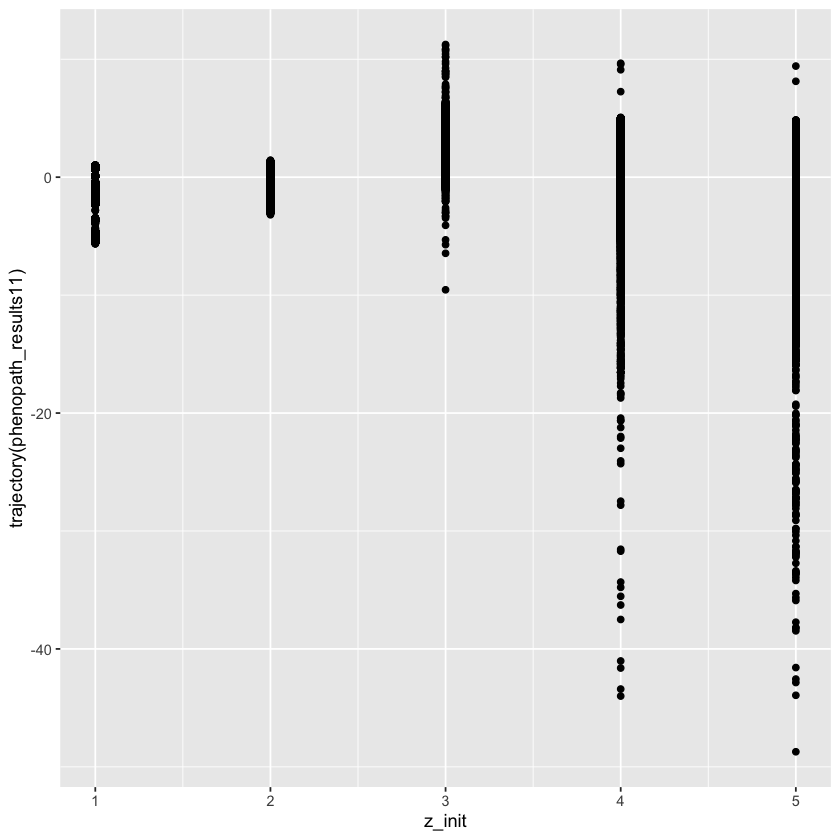

In [23]:
qplot(z_init, trajectory(phenopath_results11))

In [24]:
cor(z_init, trajectory(phenopath_results11))

[1] 0.100316

In [121]:
cor(exp(z_init), trajectory(phenopath_results11))

[1] 0.03975663

In [122]:
spearman(z_init, trajectory(phenopath_results11))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 2.7487e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3193829 


ok yeah this is definitely much better than before

In [25]:
interaction_sds(phenopath_results11)

0.0008364617,0.0005343536,1.430438e-04,1.250638e-04,0.0005465915,0.0005851150,0.0008794410,0.0006186337,3.348321e-05,1.324247e-04,0.0020257995
0.0007863029,0.0005023120,1.344664e-04,1.175645e-04,0.0005138158,0.0005500293,0.0008267068,0.0005815382,3.147543e-05,1.244840e-04,0.0019043298
0.0014281188,0.0009123254,2.442257e-04,2.135275e-04,0.0009332195,0.0009989919,0.0015015041,0.0010562194,5.716752e-05,2.260951e-04,0.0034586052
0.0017891758,0.0011429835,3.059725e-04,2.675131e-04,0.0011691599,0.0012515607,0.0018811091,0.0013232562,7.162104e-05,2.832581e-04,0.0043328787
0.0016343963,0.0010441041,2.795025e-04,2.443702e-04,0.0010680210,0.0011432883,0.0017183793,0.0012087817,6.542502e-05,2.587532e-04,0.0039581022
0.0009894631,0.0006320968,1.692093e-04,1.479404e-04,0.0006465732,0.0006921445,0.0010403061,0.0007317931,3.960794e-05,1.566477e-04,0.0023963451
0.0006529081,0.0004170953,1.116543e-04,9.761979e-05,0.0004266477,0.0004567177,0.0006864579,0.0004828811,2.613566e-05,1.033654e-04,0.0015812714
0.0012763380,0.0008153623,2.182688e-04,1.908333e-04,0.0008340357,0.0008928179,0.0013419224,0.0009439665,5.109164e-05,2.020653e-04,0.0030910559
0.0016699125,0.0010667930,2.855764e-04,2.496806e-04,0.0010912247,0.0011681329,0.0017557182,0.0012350493,6.684678e-05,2.643761e-04,0.0040441010
0.0019012573,0.0012145865,3.251407e-04,2.842718e-04,0.0012424029,0.0013299655,0.0019989494,0.0014061522,7.610787e-05,3.010034e-04,0.0046042697
0.0003325169,0.0002124206,5.686386e-05,4.971630e-05,0.0002172855,0.0002325997,0.0003496033,0.0002459244,1.331050e-05,5.264248e-05,0.0008053258


In [26]:
sum(interaction_sds(phenopath_results11))

[1] 0.1026974

## Scaling, and No Spoonfed Initial Z

In [27]:
time_start <- proc.time()
phenopath_results10 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, elbo_tol=1, maxiter=100)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -7495347.18497986 	 Inf 
[ 2 ] 	 -3055331.21353008 	 145.320283175449 
[ 3 ] 	 -1099697.36956139 	 177.833820294458 
[ 4 ] 	 -649585.740013425 	 69.292104463171 
[ 5 ] 	 -453946.654001087 	 43.0973737305859 
[ 6 ] 	 -322367.700386708 	 40.8164197146734 
[ 7 ] 	 -221758.837967127 	 45.3685919992487 
[ 8 ] 	 -139307.335741512 	 59.186762697555 
[ 9 ] 	 -67516.9998548887 	 106.329274169349 
[ 10 ] 	 -2064.8280295697 	 3169.86068030851 
[ 11 ] 	 58945.4791458749 	 103.502945534567 
[ 12 ] 	 115171.384819909 	 48.8193362977733 
[ 13 ] 	 165398.663162763 	 30.367402844984 
[ 14 ] 	 209364.320914694 	 20.9995941810186 
[ 15 ] 	 248056.380975825 	 15.5980910101649 
[ 16 ] 	 282872.311018975 	 12.3080021221357 
[ 17 ] 	 314997.848311979 	 10.1986529321263 
[ 18 ] 	 345247.775913748 	 8.76180230899609 
[ 19 ] 	 374117.675105325 	 7.71679637521802 
[ 20 ] 	 401888.09766319 	 6.90998880517681 
[ 21 ] 	 428716.455823891 	 6.25783260620215 
[ 22 ] 	 454697.6868773 

    user   system  elapsed 
 915.819   42.451 1107.012 

In [28]:
interaction_effects(phenopath_results10)

-1.864166591,0.005015556,-0.0055346112,-0.006710416,-0.005474276,-0.0033088510,-0.02538634,-0.0020922834,-0.008856153,-0.0045028989,-0.217523293
-0.004433308,-0.786835408,0.0051014184,0.005562761,0.004907110,-0.0005175478,0.04803028,0.0126048050,0.007723017,0.0085072000,0.001627578
0.018278888,0.019716046,4.0207193106,-0.011054079,-0.017774988,-0.0085266259,-0.88638145,0.1129649925,-0.010243901,0.0325664635,-0.130451412
0.135951624,0.033747502,-0.0234449314,1.681379112,-0.040268098,-0.0086001397,-0.13564906,0.0376809162,0.016194443,0.0240807279,-0.229375406
-0.013147196,0.167381682,-0.0077540104,-0.007259833,4.109088831,-0.0071938129,-0.52571475,0.0966020387,-0.007329316,-0.0106191609,-0.154757577
0.036286572,0.107947208,-0.0106603115,-0.022179061,-0.013622410,3.6078642871,-0.03409767,0.0844084238,0.009146981,0.0304851151,0.342659116
0.015103152,0.026556283,-0.0001494927,-0.002045693,-0.004511869,-0.0018410098,0.77859012,-0.0440683538,-0.001985842,-0.0036316227,-0.188654711
-0.009228956,-0.001295642,-0.0054102422,-0.005850914,0.002134927,-0.0046431318,-0.32901766,-2.1078519844,0.001203247,-0.0002832606,-0.156133139
-0.002226854,0.066789711,0.0081015949,0.014701957,0.005489418,0.0006290923,-0.06620629,0.0032091526,-1.587391336,0.0181495603,-0.075970422
0.013679572,0.003468445,-0.0058732850,-0.008686199,-0.008407868,-0.0052260271,-0.04218617,-0.0022214515,-0.013905464,-2.3733525103,-0.426779137
-0.021130298,0.066196448,-0.0193369194,-0.023718633,-0.023835118,-0.0205886277,-0.07601569,-0.0006992412,-0.007605600,-0.0030856624,0.010100817


In [29]:
significant_interactions(phenopath_results10) * interaction_effects(phenopath_results10)

-1.864166591,0.005015556,-0.0055346112,-0.006710416,-0.005474276,-0.0033088510,-0.02538634,-0.0020922834,0.000000000,-0.004502899,-0.217523293
-0.004433308,-0.786835408,0.0051014184,0.005562761,0.004907110,-0.0005175478,0.04803028,0.0000000000,0.007723017,0.008507200,0.001627578
0.018278888,0.019716046,4.0207193106,-0.011054079,-0.017774988,-0.0085266259,0.00000000,0.1129649925,-0.010243901,0.032566464,-0.130451412
0.135951624,0.033747502,-0.0234449314,1.681379112,-0.040268098,-0.0086001397,-0.13564906,0.0376809162,0.016194443,0.024080728,-0.229375406
-0.013147196,0.167381682,-0.0077540104,-0.007259833,4.109088831,-0.0071938129,-0.52571475,0.0966020387,-0.007329316,-0.010619161,-0.154757577
0.036286572,0.107947208,-0.0106603115,-0.022179061,-0.013622410,3.6078642871,-0.03409767,0.0844084238,0.009146981,0.030485115,0.342659116
0.015103152,0.026556283,-0.0001494927,-0.002045693,-0.004511869,-0.0018410098,0.77859012,-0.0440683538,-0.001985842,-0.003631623,-0.188654711
0.000000000,-0.001295642,-0.0054102422,-0.005850914,0.002134927,-0.0046431318,-0.32901766,-2.1078519844,0.000000000,0.000000000,0.000000000
-0.002226854,0.066789711,0.0081015949,0.014701957,0.005489418,0.0006290923,-0.06620629,0.0000000000,-1.587391336,0.018149560,-0.075970422
0.013679572,0.003468445,-0.0058732850,-0.008686199,-0.008407868,-0.0052260271,-0.04218617,0.0000000000,-0.013905464,-2.373352510,-0.426779137
-0.021130298,0.000000000,-0.0193369194,-0.023718633,-0.023835118,-0.0205886277,-0.07601569,-0.0006992412,-0.007605600,-0.003085662,0.010100817


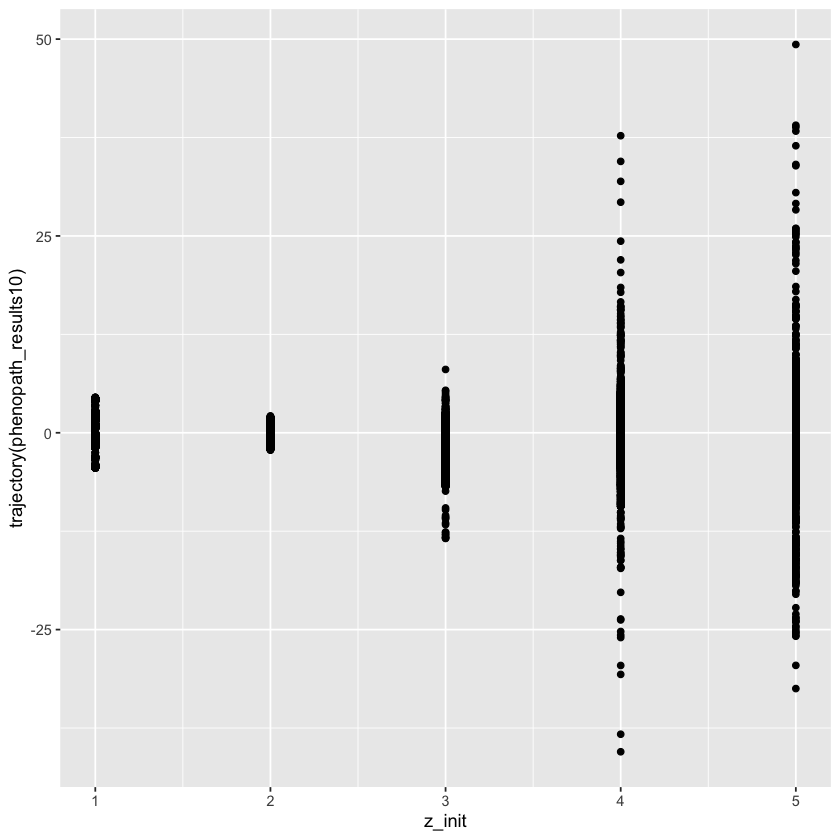

In [30]:
qplot(z_init, trajectory(phenopath_results10))

In [31]:
cor(z_init, trajectory(phenopath_results10))

[1] 0.2306541

In [123]:
cor(exp(z_init), trajectory(phenopath_results10))

[1] 0.2129989

In [124]:
spearman(z_init, trajectory(phenopath_results10))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 1.0243e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.508355 


In [32]:
interaction_sds(phenopath_results10)

0.0006426585,0.0006012797,0.0003166874,1.555258e-04,0.0004413696,2.593253e-05,0.0007949342,0.0008071167,0.0005148321,0.0007424274,0.001977803
0.0006258776,0.0005855803,0.0003084186,1.514649e-04,0.0004298453,2.525542e-05,0.0007741782,0.0007860426,0.0005013897,0.0007230423,0.001926163
0.0018200440,0.0017028627,0.0008968911,4.404645e-04,0.0012499947,7.344357e-05,0.0022512991,0.0022857821,0.0014580428,0.0021025871,0.005600536
0.0015229937,0.0014249365,0.0007505032,3.685743e-04,0.0010459794,6.145648e-05,0.0018838546,0.0019127237,0.0012200725,0.0017594257,0.004686684
0.0017113889,0.0016012031,0.0008433430,4.141683e-04,0.0011753774,6.905891e-05,0.0021168908,0.0021493252,0.0013709979,0.0019770658,0.005266281
0.0012750688,0.0011929738,0.0006283287,3.085738e-04,0.0008757051,5.145193e-05,0.0015771889,0.0016013590,0.0010214582,0.0014730145,0.003923876
0.0005554118,0.0005196512,0.0002736945,1.344119e-04,0.0003814501,2.241197e-05,0.0006870162,0.0006975444,0.0004449395,0.0006416371,0.001709308
0.0009416636,0.0008810344,0.0004640319,2.278870e-04,0.0006467243,3.799812e-05,0.0011647881,0.0011826440,0.0007543661,0.0010878518,0.002897944
0.0011955958,0.0011186174,0.0005891655,2.893406e-04,0.0008211233,4.824496e-05,0.0014788860,0.0015015497,0.0009577946,0.0013812043,0.003679324
0.0011873609,0.0011109127,0.0005851075,2.873476e-04,0.0008154676,4.791266e-05,0.0014687000,0.0014912076,0.0009511950,0.0013717010,0.003654005
0.0002491938,0.0002331493,0.0001227970,6.030583e-05,0.0001711432,1.005546e-05,0.0003082402,0.0003129640,0.0001996287,0.0002878803,0.000766915


In [33]:
sum(interaction_sds(phenopath_results10))

[1] 0.1281095

## Centering but not scaling, model intercepts, no z init

don't get why scaling improves performance, that seems like it would be the signal we want to identify/understand

In [42]:
time_start <- proc.time()
# https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/scale
centered_cell_log_counts <- scale(cell_log_counts, center=TRUE, scale=FALSE)
phenopath_results_center_no_scale <- phenopath(centered_cell_log_counts, cell_init_vectors, 
                                               model_mu=TRUE, elbo_tol=1, maxiter=100,
                                              scale_y=FALSE) # scale_y just does scale(y, center=TRUE, scale=TRUE)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 1 ] 	 -7865281.41251349 	 Inf 
[ 2 ] 	 -3324687.4966274 	 136.572051373012 
[ 3 ] 	 -1337616.35389623 	 148.553143578365 
[ 4 ] 	 -840715.115544098 	 59.1045919318995 
[ 5 ] 	 -625703.116140731 	 34.3632617221945 
[ 6 ] 	 -482257.183727086 	 29.7446958291083 
[ 7 ] 	 -375002.715907532 	 28.6009842782045 
[ 8 ] 	 -288704.704028154 	 29.8914464071088 
[ 9 ] 	 -214365.696757529 	 34.6785928882597 
[ 10 ] 	 -146876.203509866 	 45.9499167563446 
[ 11 ] 	 -84736.6720055465 	 73.3325135783626 
[ 12 ] 	 -29064.7788382698 	 191.544183002601 
[ 13 ] 	 19377.883222878 	 249.989441591614 
[ 14 ] 	 61530.761821078 	 68.5069993457486 
[ 15 ] 	 98978.4563630502 	 37.8341872746682 
[ 16 ] 	 133062.97674495 	 25.6153298353093 
[ 17 ] 	 164750.117406298 	 19.2334555872895 
[ 18 ] 	 194691.310243375 	 15.3788028852696 
[ 19 ] 	 223293.791214603 	 12.8093489817364 
[ 20 ] 	 250796.61791323 	 10.9661872346869 
[ 21 ] 	 277340.953284361 	 9.57101180218224 
[ 22 ] 	 303019.515802

    user   system  elapsed 
 950.776   46.942 1138.300 

In [43]:
interaction_effects(phenopath_results_center_no_scale)

-6.132854747,0.005373630,-0.0038301148,-0.003839848,-0.003974026,-0.0029496815,-0.02367290,-0.001412680,-0.007434115,-0.0034805456,-0.73994425
-0.013528104,-0.748323159,0.0038567570,0.003393964,0.003656887,-0.0001585888,0.04246310,0.008575137,0.006954275,0.0075698769,0.01077673
0.062663894,0.016742744,2.8800321179,-0.006509927,-0.013001686,-0.0075190552,-0.82161122,0.078213089,-0.009279641,0.0266912550,-0.46525627
0.449261915,0.030982770,-0.0165891075,0.980325061,-0.030077131,-0.0076259299,-0.12518493,0.026183614,0.014263279,0.0197063646,-0.78996229
-0.042681054,0.155707990,-0.0053603376,-0.003896689,3.055706768,-0.0060722887,-0.48601145,0.066232506,-0.006071805,-0.0080503444,-0.52556896
0.120415835,0.103403500,-0.0061062631,-0.011631120,-0.008593789,3.2625764213,-0.02887134,0.059160935,0.009161673,0.0265072348,1.29184964
0.048997292,0.026381931,-0.0001668724,-0.001247052,-0.003288268,-0.0016727966,0.71791313,-0.029838751,-0.001683998,-0.0026596326,-0.65021741
-0.028752717,-0.001989067,-0.0034052255,-0.003073861,0.001694524,-0.0037279146,-0.30358144,-1.461478286,0.001548225,0.0001937814,-0.52645234
-0.006543723,0.062685075,0.0063507664,0.008856567,0.004596593,0.0012703887,-0.05946599,0.002307899,-1.347020712,0.0155894887,-0.24734038
0.044145275,0.004173296,-0.0039440170,-0.004791581,-0.005828233,-0.0044232615,-0.03862240,-0.001367690,-0.011210069,-1.8568411473,-1.45362799
-0.064128650,0.058909188,-0.0118551047,-0.012355158,-0.015664668,-0.0161623852,-0.06530737,-0.001028481,-0.005021439,-0.0001468676,0.06474232


In [44]:
significant_interactions(phenopath_results_center_no_scale) * interaction_effects(phenopath_results_center_no_scale)

-6.132854747,0.005373630,-0.0038301148,-0.003839848,-0.003974026,-0.0029496815,-0.02367290,-0.001412680,0.000000000,-0.0034805456,-0.73994425
-0.013528104,-0.748323159,0.0038567570,0.003393964,0.003656887,-0.0001585888,0.04246310,0.000000000,0.006954275,0.0075698769,0.01077673
0.062663894,0.016742744,2.8800321179,-0.006509927,-0.013001686,-0.0075190552,0.00000000,0.078213089,-0.009279641,0.0266912550,-0.46525627
0.449261915,0.030982770,-0.0165891075,0.980325061,-0.030077131,-0.0076259299,-0.12518493,0.026183614,0.014263279,0.0197063646,-0.78996229
-0.042681054,0.155707990,-0.0053603376,-0.003896689,3.055706768,-0.0060722887,-0.48601145,0.066232506,-0.006071805,-0.0080503444,-0.52556896
0.120415835,0.103403500,-0.0061062631,-0.011631120,-0.008593789,3.2625764213,-0.02887134,0.059160935,0.009161673,0.0265072348,1.29184964
0.048997292,0.026381931,-0.0001668724,-0.001247052,-0.003288268,-0.0016727966,0.71791313,-0.029838751,-0.001683998,-0.0026596326,-0.65021741
0.000000000,-0.001989067,-0.0034052255,-0.003073861,0.001694524,-0.0037279146,-0.30358144,-1.461478286,0.000000000,0.0000000000,-0.52645234
-0.006543723,0.062685075,0.0063507664,0.008856567,0.004596593,0.0012703887,-0.05946599,0.000000000,-1.347020712,0.0155894887,-0.24734038
0.044145275,0.004173296,-0.0039440170,-0.004791581,-0.005828233,-0.0044232615,-0.03862240,0.000000000,-0.011210069,-1.8568411473,0.00000000
-0.064128650,0.000000000,-0.0118551047,-0.012355158,-0.015664668,-0.0161623852,-0.06530737,-0.001028481,-0.005021439,-0.0001468676,0.06474232


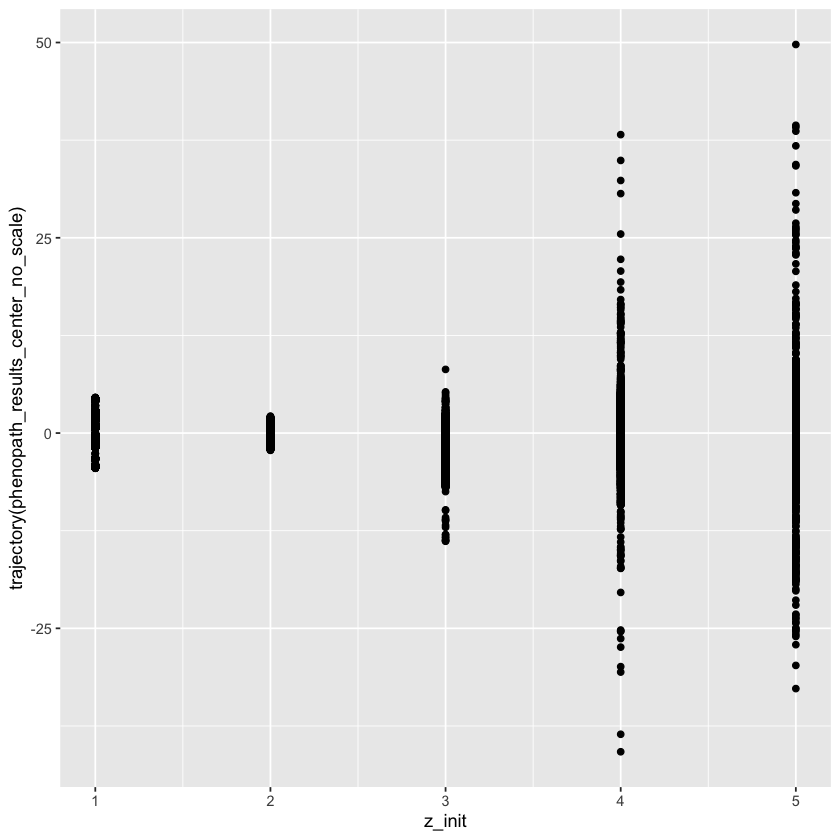

In [45]:
qplot(z_init, trajectory(phenopath_results_center_no_scale))

In [46]:
cor(z_init, trajectory(phenopath_results_center_no_scale))

[1] 0.2243746

In [125]:
cor(exp(z_init), trajectory(phenopath_results_center_no_scale))

[1] 0.2041747

In [126]:
spearman(z_init, trajectory(phenopath_results_center_no_scale))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 1.0233e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5088155 


In [47]:
interaction_sds(phenopath_results_center_no_scale)

0.0021080891,0.0005688850,2.208418e-04,8.896577e-05,0.0003234726,2.183187e-05,0.0007274346,0.0005554527,0.0004454901,0.0005932176,0.006905814
0.0020333556,0.0005487291,2.130171e-04,8.581362e-05,0.0003120117,2.105834e-05,0.0007016610,0.0005357725,0.0004297059,0.0005721993,0.006660893
0.0060861972,0.0016427063,6.377082e-04,2.568997e-04,0.0009340641,6.304226e-05,0.0021005282,0.0016039204,0.0012863986,0.0017129669,0.019907687
0.0050364273,0.0013592728,5.276748e-04,2.125732e-04,0.0007728978,5.216468e-05,0.0017380969,0.0013271788,0.0010644408,0.0014174112,0.016485836
0.0056950926,0.0015371106,5.967133e-04,2.403854e-04,0.0008740227,5.898969e-05,0.0019654976,0.0015008175,0.0012037059,0.0016028547,0.018633178
0.0042865429,0.0011568618,4.490970e-04,1.809182e-04,0.0006578034,4.439665e-05,0.0014792770,0.0011295467,0.0009059326,0.0012063429,0.014038313
0.0018144647,0.0004896562,1.900850e-04,7.657544e-05,0.0002784224,1.879133e-05,0.0006261250,0.0004780946,0.0003834464,0.0005105999,0.005944295
0.0030761392,0.0008301599,3.222695e-04,1.298258e-04,0.0004720363,3.185877e-05,0.0010615264,0.0008105600,0.0006500932,0.0008656676,0.010074761
0.0038453971,0.0010377870,4.028714e-04,1.622962e-04,0.0005900957,3.982689e-05,0.0013270174,0.0010132834,0.0008126867,0.0010821752,0.012590258
0.0038036244,0.0010265118,3.984943e-04,1.605329e-04,0.0005836845,3.939418e-05,0.0013125999,0.0010022744,0.0008038557,0.0010704218,0.012458593
0.0008176955,0.0002206626,8.566136e-05,3.450854e-05,0.0001254704,8.468268e-06,0.0002821621,0.0002154524,0.0001727993,0.0002301009,0.002679092


In [48]:
sum(interaction_sds(phenopath_results_center_no_scale))

[1] 0.2299144

## Times seem really slow now, maybe thinning would actually help idk?

thought problem size is the same though, although i suppose there are more strains even if the number of droplets is the same

still seems much slower though

was approximately 50 iterations, so let's set `thin=5`

In [49]:
time_start <- proc.time()
phenopath_results10 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, elbo_tol=1, maxiter=100, thin=5)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 5 ] 	 -453946.654001087 	 Inf 
[ 10 ] 	 -2064.8280295697 	 4376.94393431579 
[ 15 ] 	 248056.380975825 	 20.1664805413549 
[ 20 ] 	 401888.09766319 	 7.65545024009576 
[ 25 ] 	 528145.658179126 	 4.78116438375092 
[ 30 ] 	 637790.108945936 	 3.43826124704307 
[ 35 ] 	 733627.179678362 	 2.61269138840912 
[ 40 ] 	 816449.903361478 	 2.02885010683739 
[ 45 ] 	 885988.937914253 	 1.56974949859939 
[ 50 ] 	 941409.414074628 	 1.17739371057493 
[ 55 ] 	 981781.298734669 	 0.822421138232574 


    user   system  elapsed 
 828.130   47.539 1023.151 

this is fewer than 100 seconds faster ...

definitely not a factor of 5 decrease so ELBO computation seems unlikely to be largest contributor to cost

In [50]:
time_start <- proc.time()
phenopath_results10 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, elbo_tol=1, maxiter=10, thin=5)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 5 ] 	 -453946.654001087 	 Inf 


Warning message in clvm(y, x_mat, elbo_tol = elbo_tol, z_init = z_init, ...):
“ELBO not converged”


   user  system elapsed 
131.158   9.109 161.761 

In [51]:
time_start <- proc.time()
phenopath_results10 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, elbo_tol=1, maxiter=100, thin=10)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 10 ] 	 -2064.8280295697 	 Inf 
[ 20 ] 	 401888.09766319 	 10.0513781831703 
[ 30 ] 	 637790.108945936 	 3.69874050998716 
[ 40 ] 	 816449.903361478 	 2.18825176756058 
[ 50 ] 	 941409.414074628 	 1.32736627491644 
[ 60 ] 	 1006632.69010232 	 0.647935206843545 


    user   system  elapsed 
 889.949   50.782 1054.192 

ok so yeah this does not significantly change/decrease from the approximately 22 seconds per iteration rule -- the one above was also about 18 per seconds with iteration after thinning, this one is then takes even longer because it does five more iterations even if it slightly faster per iteration

but anyway going from 22 seconds per iteration to 18 seconds per iteration while also doing more iterations leads to maybe cutting off a minute max? i mean idk it does make te output easier to read I guess and at the same time is still probably not worth it? like e.g. if you add 8 more iterations, then unless you did a lot of iterations to start with (in which case then there's still little benefit because both are slower, one is just really slow) you add 160 seconds, while having only taken 18*(# iterations with thin=1) fewer seconds to get there, so in order for there to be a payoff you need 18x > 160, so x > 9 --- hm well yeah you're pretty much guaranteed to have more than 10 iterations.

OK fine honestly yeah it probably is worth it at this point but everything is still slow as heck

## correlation of pseudotimes with actual times -- maybe should be exponential

ok so tyring to force phenopath model to approximately fit data, assume data for given strain evolves using gLV (unmoidifed), given strain is affected by others but doesn't affect them and they aren't affected by each other and all have growth rates equal to 1. then the integral of the log growth will equal log(init) + growth rate * t  + sum species(-int. coeff   +  int coefficient * exp(t) )  since integral of exponential starting from 0 is exp(x) - 1 (I think).

So that makes it look like pseudotime should actually approximately be exponential of true time (at least using the presence/absence as the covariates but now I am having crisis of confidence -- maybe I should use the true counts as the covariates instead? because that would kind of also make sense to for an approximation of discretized version of gLV which shoot I guess I should also try?)

also looking at the q plots, they do kind of look closer to funky exponentials than anything right? so i was wondering as a very preliminary investigation -- maybe the correlations will be better with the exponentials of the true times? who knows right until you actually crunch the numbers?

In [52]:
cor(z_init, trajectory(phenopath_results10))

[1] 0.2347307

In [53]:
cor(exp(z_init), trajectory(phenopath_results10))

[1] 0.2129989

ok, lower...

In [54]:
cor(z_init, trajectory(phenopath_results_center_no_scale))

[1] 0.2243746

In [55]:
cor(exp(z_init), trajectory(phenopath_results_center_no_scale))

[1] 0.2041747

ok again lower...

In [56]:
cor(z_init, trajectory(phenopath_results00))

[1] 0.2708153

In [57]:
cor(exp(z_init), trajectory(phenopath_results00))

[1] 0.2427417

again lower ... seeing a consistent trend here tbh

In [58]:
cor(z_init, trajectory(phenopath_results01))

[1] 0.5205028

In [59]:
cor(exp(z_init), trajectory(phenopath_results01))

[1] 0.4222491

again, lower...

In [60]:
cor(z_init, trajectory(phenopath_results11))

[1] 0.100316

In [61]:
cor(exp(z_init), trajectory(phenopath_results11))

[1] 0.03975663

oof dang much lower

yeah OK I mean I know extreme values part kind of look exponential-y, the pseudotimes for later batches have super wide spreads, right? so like you're never going to have much like trying to capture any relationship with them accurately just by matching the highest values better you know

looking at the graphs some more and thinking about that reasoning, I think the correlation values are just proxies for how spread out the pseudotimes are especially for later batches. like the ones with the largest correlation have the smallest average spread (10s ish), while for the smallest correlation the opposite seems to be true (40s ish)

which would make sense intuitively, the bigger spread you have, the less you are able to be describe by a flat line, especially if the spread is downwards biased, as usually appears to be the case here, all the more so if the flat line is upwards directed -- and then curving that line up even more by making it an exponential? no wonder the correlation got even worse

but anyway thinking about all of this makes me wonder what would happen if we did use the actual values (not log counts but actual counts because I don't think log counts would make sense although not sure) as the covariates?

like if population of other species was constant for whatever reason then net effect on population would grow with population for example

In [70]:
cell_counts = exp(cell_log_counts)*(cell_log_counts != 0)

In [71]:
cell_counts[1,]

[1]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [9]  0.00000  0.00000 22.69598

In [72]:
cell_log_counts[1,]

[1] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 [9] 0.000000 0.000000 3.122188

In [73]:
exp(3.122)

[1] 22.69172

In [74]:
cell_counts[42,]

[1] 0 0 0 0 0 0 0 0 0 0 0

In [75]:
cell_log_counts[42,]

[1] 0 0 0 0 0 0 0 0 0 0 0

In [76]:
cell_counts[68,]

[1]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [9]  0.00000  0.00000 21.74059

In [77]:
cell_log_counts[68,]

[1] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 [9] 0.000000 0.000000 3.079181

OK, seems legit to me I guess

anyway let's try these as the covariates now

In [78]:
time_start <- proc.time()
phenopath_results_test <- phenopath(cell_log_counts, cell_counts, model_mu=TRUE,
                              scale_y=FALSE, z_init=z_init, elbo_tol=1, maxiter=100, thin=10)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 10 ] 	 -8143597.08257448 	 Inf 
[ 20 ] 	 -6870371.33169139 	 1.8532124239195 
[ 30 ] 	 -6404979.32389679 	 0.726609695769419 


   user  system elapsed 
451.625  26.427 555.127 

oh dang that was a lot quicker than I expected/am used to

admittedly the ELBO is a lot smaller though

In [79]:
cor(z_init, trajectory(phenopath_results_test))

[1] -0.01800967

In [127]:
cor(exp(z_init), trajectory(phenopath_results_test))

[1] -0.005649877

In [128]:
spearman(z_init, trajectory(phenopath_results_test))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 3.1421e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.5082188 


oof dang that's basically garbage brah

In [82]:
interaction_effects(phenopath_results_test)

5.180063e-04,1.700813e-06,8.604724e-05,-1.620381e-05,2.089263e-05,-2.399539e-05,4.489128e-04,7.879941e-05,-1.110734e-05,-2.854519e-06,8.067164e-05
1.440023e-06,-2.274834e-05,-1.532435e-08,1.624750e-07,1.028211e-06,-6.574048e-06,3.776768e-07,4.557950e-07,-1.288785e-06,2.379340e-07,-1.579889e-06
7.457710e-06,-2.253228e-04,-3.652859e-04,-3.521403e-06,8.858909e-06,-1.429067e-05,3.658099e-06,2.922288e-06,-1.429841e-05,-1.338882e-04,-1.549879e-04
-2.118221e-03,5.482088e-03,-4.391551e-04,1.948496e-02,-6.721129e-03,5.527336e-04,9.678473e-04,2.003729e-03,-4.120201e-03,7.495364e-04,9.758609e-04
5.983531e-03,1.632987e-03,3.309436e-04,-6.838732e-05,3.500207e-02,8.929400e-04,3.154231e-04,4.214472e-04,5.747113e-05,1.136685e-03,3.095044e-02
-2.832542e-09,3.794286e-07,7.418157e-10,-3.196060e-09,-1.925846e-08,1.185116e-07,-4.939953e-09,-7.113314e-09,2.150228e-08,-3.552657e-09,6.278743e-08
1.763795e-05,1.745525e-05,-1.446166e-04,-2.276736e-06,-3.194568e-05,5.275603e-07,1.194591e-05,-2.484006e-04,-1.819823e-05,1.889483e-06,-9.890805e-06
1.280334e-03,3.004518e-04,-1.325592e-04,-1.333728e-04,-1.929122e-04,-1.840451e-04,-4.136045e-06,-9.680718e-03,-9.164336e-04,1.362695e-04,-5.627944e-03
2.193840e-05,6.912458e-05,5.374113e-06,-1.181605e-05,-1.921527e-05,4.849810e-06,1.054229e-05,2.462237e-05,1.000695e-03,2.117288e-05,4.101145e-04
2.950578e-14,5.263948e-14,-1.020755e-15,-9.319659e-15,-1.241821e-14,-3.144091e-14,1.329164e-15,1.175067e-13,-5.165129e-14,-1.935465e-12,-2.699689e-13
-5.655856e-04,2.108384e-05,-1.678704e-07,-3.578587e-06,-4.955686e-06,1.135415e-06,9.039445e-07,6.217590e-06,-1.898322e-05,3.289686e-06,2.810594e-05


ook OK yeah definitely garbage I think? maybe if ran for more iterations the values would get larger though, I don't know?

In [83]:
interaction_effects(phenopath_results_test) * significant_interactions(phenopath_results_test)

5.180063e-04,1.700813e-06,0.000000e+00,-1.620381e-05,2.089263e-05,0.000000e+00,4.489128e-04,7.879941e-05,-1.110734e-05,0.000000e+00,8.067164e-05
0.000000e+00,-2.274834e-05,-1.532435e-08,1.624750e-07,1.028211e-06,-6.574048e-06,3.776768e-07,4.557950e-07,-1.288785e-06,0.000000e+00,-1.579889e-06
7.457710e-06,0.000000e+00,-3.652859e-04,-3.521403e-06,8.858909e-06,0.000000e+00,3.658099e-06,2.922288e-06,-1.429841e-05,0.000000e+00,0.000000e+00
-2.118221e-03,5.482088e-03,-4.391551e-04,1.948496e-02,-6.721129e-03,5.527336e-04,9.678473e-04,2.003729e-03,-4.120201e-03,7.495364e-04,9.758609e-04
5.983531e-03,1.632987e-03,3.309436e-04,-6.838732e-05,3.500207e-02,8.929400e-04,3.154231e-04,4.214472e-04,5.747113e-05,0.000000e+00,3.095044e-02
-2.832542e-09,3.794286e-07,7.418157e-10,-3.196060e-09,-1.925846e-08,1.185116e-07,0.000000e+00,-7.113314e-09,2.150228e-08,0.000000e+00,6.278743e-08
1.763795e-05,1.745525e-05,0.000000e+00,-2.276736e-06,-3.194568e-05,5.275603e-07,1.194591e-05,0.000000e+00,-1.819823e-05,0.000000e+00,-9.890805e-06
1.280334e-03,3.004518e-04,0.000000e+00,-1.333728e-04,-1.929122e-04,-1.840451e-04,-4.136045e-06,-9.680718e-03,-9.164336e-04,1.362695e-04,-5.627944e-03
2.193840e-05,6.912458e-05,5.374113e-06,-1.181605e-05,0.000000e+00,4.849810e-06,1.054229e-05,2.462237e-05,1.000695e-03,2.117288e-05,4.101145e-04
0.000000e+00,5.263948e-14,-1.020755e-15,-9.319659e-15,-1.241821e-14,0.000000e+00,0.000000e+00,1.175067e-13,-5.165129e-14,-1.935465e-12,-2.699689e-13
-5.655856e-04,2.108384e-05,-1.678704e-07,0.000000e+00,-4.955686e-06,1.135415e-06,9.039445e-07,6.217590e-06,-1.898322e-05,3.289686e-06,2.810594e-05


ugh ew, most of this garbage is treated as significant

great, so now we're wondering between whether or not to scale and whether or not to use indicators or actually counts, or whether to use the manual z_init or not (you know honestly probably not I'm not sure why I ever thought that was a good idea, it always gets a lower ELBO you know (update: huh not actually true in this notebook, only 50% of time, was true in previous notebook, ELBO is proxy but real test would be correlation with truth?), plus I doubt anyone would come up with it besides me ) and you know I'm kind of getting sick and tired of this 

In [84]:
time_start <- proc.time()
phenopath_results_test2 <- phenopath(cell_log_counts, cell_counts, model_mu=TRUE,
                              scale_y=FALSE, elbo_tol=1, maxiter=100, thin=10)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 10 ] 	 -8139519.50041427 	 Inf 
[ 20 ] 	 -6609525.40314254 	 2.31483200979042 
[ 30 ] 	 -6227193.51705824 	 0.613971422338123 


   user  system elapsed 
433.837  25.706 535.737 

In [91]:
cor(z_init, trajectory(phenopath_results_test2))

[1] -0.03402191

In [92]:
cor(exp(z_init), trajectory(phenopath_results_test2))

[1] -0.04413684

In [93]:
cor.test(z_init, trajectory(phenopath_results_test2), method='spearman')

Warning message in cor.test.default(z_init, trajectory(phenopath_results_test2), :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  z_init and trajectory(phenopath_results_test2)
S = 1.1443e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4507397 


huh the spearman correlation is actually kind of large.
also presumably it shoud be the same for exp of blah?

In [94]:
cor.test(exp(z_init), trajectory(phenopath_results_test2), method='spearman')

Warning message in cor.test.default(exp(z_init), trajectory(phenopath_results_test2), :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  exp(z_init) and trajectory(phenopath_results_test2)
S = 1.1443e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4507397 


yes indeed it is b/c exp is a monotonic function, good yay

In [85]:
time_start <- proc.time()
phenopath_results_test3 <- phenopath(cell_log_counts, cell_counts, model_mu=TRUE,
                              scale_y=TRUE, z_init=z_init, elbo_tol=1, maxiter=100, thin=10)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 10 ] 	 -7987755.06761736 	 Inf 
[ 20 ] 	 -6689037.1081698 	 1.94156189963626 
[ 30 ] 	 -6324502.04838436 	 0.576385392868301 


   user  system elapsed 
459.855  25.584 551.492 

huh dang _another_ instance of when the scaling actually produces _worse_ ELBO

In [96]:
cor(z_init, trajectory(phenopath_results_test3))

[1] -0.01195289

In [97]:
cor(exp(z_init), trajectory(phenopath_results_test3))

[1] -0.01587484

In [129]:
cor.test(z_init, trajectory(phenopath_results_test3), method='spearman')

Warning message in cor.test.default(z_init, trajectory(phenopath_results_test3), :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  z_init and trajectory(phenopath_results_test3)
S = 2.238e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07425389 


ok oof in contrast this seems to be just plain garbage -- even the Spearman correlation is terrible

In [99]:
spearman <- function(x,y){return(cor.test(x,y,method='spearman'))}

In [86]:
time_start <- proc.time()
phenopath_results_test4 <- phenopath(cell_log_counts, cell_counts, model_mu=TRUE,
                              scale_y=TRUE, elbo_tol=1, maxiter=100, thin=10)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 10 ] 	 -7983204.78793911 	 Inf 
[ 20 ] 	 -6469924.16790649 	 2.33894645556916 
[ 30 ] 	 -5989653.49682713 	 0.801833814483207 


   user  system elapsed 
491.231  30.421 601.995 

In [101]:
cor(z_init, trajectory(phenopath_results_test4))

[1] -0.03295415

In [102]:
cor(exp(z_init), trajectory(phenopath_results_test4))

[1] -0.04960509

In [103]:
spearman(z_init, trajectory(phenopath_results_test4))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 1.0563e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4929547 


ok this time it's decent again huh, even slightly better than it's non-scaling counterpart

In [87]:
time_start <- proc.time()
phenopath_results_test5 <- phenopath(cell_log_counts, cell_counts, model_mu=TRUE,
                              scale_y=FALSE, z_init=exp(z_init), elbo_tol=1, maxiter=100, thin=10)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 10 ] 	 -8144296.61419667 	 Inf 
[ 20 ] 	 -6847862.83232447 	 1.89319472894892 
[ 30 ] 	 -6524602.22202371 	 0.495448763465758 


   user  system elapsed 
473.887  29.902 589.057 

In [104]:
cor(z_init, trajectory(phenopath_results_test5))

[1] -0.002777345

In [105]:
cor(exp(z_init), trajectory(phenopath_results_test5))

[1] 0.01725584

In [106]:
spearman(z_init, trajectory(phenopath_results_test5))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 2.4891e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1947864 


blegh

In [88]:
time_start <- proc.time()
phenopath_results_test6 <- phenopath(cell_log_counts, cell_counts, model_mu=TRUE,
                              scale_y=TRUE, z_init=exp(z_init), elbo_tol=1, maxiter=100, thin=10)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 10 ] 	 -7988456.62806622 	 Inf 
[ 20 ] 	 -6764281.17937302 	 1.80976428423201 
[ 30 ] 	 -6371603.64516363 	 0.616293096805303 


   user  system elapsed 
478.663  28.262 585.533 

In [107]:
cor(z_init, trajectory(phenopath_results_test6))

[1] -0.009447577

In [108]:
cor(exp(z_init), trajectory(phenopath_results_test6))

[1] -0.02168041

In [109]:
spearman(z_init, trajectory(phenopath_results_test6))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 1.9578e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0602413 


double blegh

ok yeah and this time the scaling seems to be getting worse Spearman than before? hm?

is the scaling intended for data that isn't absolute counts?

In [89]:
time_start <- proc.time()
phenopath_results_test7 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=FALSE, z_init=exp(z_init), elbo_tol=1, maxiter=100, thin=10)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 10 ] 	 -9764771.56498094 	 Inf 
[ 20 ] 	 -11891794.0665328 	 1.78864727193515 
[ 30 ] 	 -14127923.4100608 	 1.58277283831793 
[ 40 ] 	 -16446420.9608827 	 1.40972771908023 
[ 50 ] 	 -18750757.3883227 	 1.22892978652433 
[ 60 ] 	 -20954235.7241814 	 1.05156702676386 
[ 70 ] 	 -23153668.9631487 	 0.949928602014601 


    user   system  elapsed 
1076.846   69.125 1492.628 

In [110]:
cor(z_init, trajectory(phenopath_results_test7))

[1] 0.009056431

In [111]:
cor(exp(z_init), trajectory(phenopath_results_test7))

[1] 0.01001316

In [112]:
spearman(z_init, trajectory(phenopath_results_test7))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 3.0512e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4645701 


hm pretty legit w.r.t. Spearman actually, although again the other correlation is terrible

In [90]:
time_start <- proc.time()
phenopath_results_test8 <- phenopath(cell_log_counts, cell_init_vectors, model_mu=TRUE,
                              scale_y=TRUE, z_init=exp(z_init), elbo_tol=1, maxiter=100, thin=10)
runtime <- proc.time() - time_start
runtime

Iteration	ELBO	Change (%) 
[ 10 ] 	 -8653358.2008481 	 Inf 
[ 20 ] 	 -11511664.4040065 	 2.48296519325526 
[ 30 ] 	 -13370747.3691478 	 1.3904106582935 
[ 40 ] 	 -15355456.1659331 	 1.29251047662687 
[ 50 ] 	 -17440897.0540247 	 1.195718822049 
[ 60 ] 	 -19443749.4602987 	 1.03007519736024 
[ 70 ] 	 -21525099.6492304 	 0.966941023664941 


    user   system  elapsed 
1050.471   62.991 1466.006 

In [114]:
cor(z_init, trajectory(phenopath_results_test8))

[1] 0.01705129

In [115]:
cor(exp(z_init), trajectory(phenopath_results_test8))

[1] 0.01724373

In [116]:
spearman(z_init, trajectory(phenopath_results_test8))

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x and y
S = 3.0585e+16, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.468084 


ditto what said before. in this case scaling doesn't seem to hurt spearman

### Attempt at summary:

ok so all of these seem to pretty consistently suggest that spoonfeeding `exp(z_init)` as the pseudotime is bad garbage and does not work well. fine

it seems to be more of a wash regarding spoonfeeding `z_init` though??? I mean the best Spearman correlation ever was from spoonfeeding it, as well as from not scaling, so if I'm being honest with myself, it does seem like a genuinely completely open question about whether to do either of those things, since sometimes not doing them improves results. of course testing all of this will slow down run times considerably, although we may simbly be out of luck there, I don't know.

In [130]:
dim(cell_log_counts)

[1] 500000     11

In [131]:
dim(cell_log_counts[1:500,1:9])

[1] 500   9

In [133]:
dumb_test <- phenopath(cell_log_counts[1:500, 1:9], cell_init_vectors[1:500,1:7])

Iteration	ELBO	Change (%) 
[ 1 ] 	 -6659.6951857194 	 Inf 
[ 2 ] 	 -3036.6244925804 	 119.312437279996 
[ 3 ] 	 -2110.74697230834 	 43.864922343558 
[ 4 ] 	 -1879.69720980927 	 12.2918606940169 
[ 5 ] 	 -1441.76032887456 	 30.3751512761178 
[ 6 ] 	 -977.471503135085 	 47.4989628086698 
[ 7 ] 	 -883.620776440639 	 10.6211543681092 
[ 8 ] 	 -868.90705534024 	 1.69335960733314 
[ 9 ] 	 -860.985586304702 	 0.920046649042776 
[ 10 ] 	 -852.429679458727 	 1.00370822979885 
[ 11 ] 	 -845.799040702275 	 0.783949666217054 
[ 12 ] 	 -842.467482114406 	 0.395452484350718 
[ 13 ] 	 -840.299886559306 	 0.257954997944377 
[ 14 ] 	 -838.748329139274 	 0.184984859716401 
[ 15 ] 	 -837.602786740652 	 0.136764396770828 
[ 16 ] 	 -836.741150518646 	 0.102975241682871 
[ 17 ] 	 -836.084358369462 	 0.0785557273747605 
[ 18 ] 	 -835.578512989327 	 0.0605383422707818 
[ 19 ] 	 -835.185608595192 	 0.047043961257497 
[ 20 ] 	 -834.878203466564 	 0.0368203562329425 
[ 21 ] 	 -834.636136565659 	 0.02900268635633

In [134]:
interaction_effects(dumb_test)

0.7858827,0.1497520,0.1447179,0.1102798,0.1383826,0.1385676,0.1773505,-0.007832846,0.01246313
0.1048698,0.9450106,0.1492295,0.1134684,0.1409797,0.1428313,0.1842248,-0.013378698,0.03143595
0.1042437,0.1534374,0.4686377,0.1127897,0.1417262,0.1419135,0.1820635,-0.009497072,0.02622650
0.1070741,0.1579019,0.1523382,0.3851067,0.1455905,0.1458095,0.1731274,-0.008470125,-1.14625045
0.1054436,0.1516216,0.1499447,0.1140826,0.4092832,0.1435305,0.1845930,-0.009158423,-0.29363632
0.1053302,0.1551851,0.1499357,0.1139775,0.1433111,0.2814733,0.1843036,-0.014533787,-1.53242949
0.1041256,0.1533363,0.1481754,0.1120638,0.1415368,0.1418220,0.4107407,-0.014388507,0.03448186


ok so entry $(i,j)$ is the effect of covariate $i$ on feature $j$ -- yes?

oh so I don't have to transpose the results at all?

well that depends on whether Python reads it as a 7 x 9 or 9 x 7, although if Python reads it as a 9 x 7 then probably Python should be the one on the hook to transpose it

In [136]:
np$savez_compressed('test.npz', dumb=interaction_effects(dumb_test))

ok i confirmed that Python loads this 'as is', in particular 7 x 9.

hm OK so yeah I guess the results of phenopath are already exactly what I want, i.e. no transposes necessary?